In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_excel('C:/Users/Admin/Downloads/Company_Data2015-1.xlsx',sheet_name='Sheet2')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

In [4]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '').str.replace(']', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [5]:
Company.rename(columns={'Gross_Block_':'Gross_Block','Net_Working_Capital_':'Net_Working_Capital','Current_Assets_':'Current_Assets',\
                       'Current_Liabilities_and_Provisions_':'Current_Liabilities_and_Provisions','Total_Assets_to_Liabilities_':
                       'Total_Assets_to_Liabilities','Book_Value_Adj._Unit_Curr':'Book_Value_Adj_Unit_Curr'}, inplace=True)

In [6]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [7]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_to_Liabilities   

- There are very few missing values, only in few columns
- numerical/categorical columns properly mapped



In [8]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.61,714001.25
Total_Debt,3586.00,1994.82,23652.84,-0.72,0.03,7.49,72.35,652823.81
Gross_Block,3586.00,594.18,4871.55,-41.19,0.57,15.87,131.90,128477.59
Net_Working_Capital,3586.00,410.81,6301.22,-13162.42,0.94,10.14,61.17,223257.56
Current_Assets,3586.00,1960.35,22577.57,-0.91,4.00,24.54,135.28,721166.00
Current_Liabilities_and_Provisions,3586.00,391.99,2675.00,-0.23,0.73,9.23,65.65,83232.98


In [9]:
Company.size

240262

In [10]:
Company.isnull().sum().sum()

118

In [11]:
(118/240262)*100

0.04911305158535265

- It is just 0.05% of the missing values present in the dataset.
- inventory velocity days - just 3% of the total is missing
- inventory velocity days - easily pointed out the bad data with -199 can be subsituted to 199, could be a data entry issue

# inspect by row wise

In [12]:
Company.isnull().sum(axis = 1).sort_values(ascending=False)

2825    11
393      1
277      1
598      1
3001     1
3441     1
153      1
2535     1
2814     1
1241     1
2984     1
168      1
1083     1
170      1
3235     1
2144     1
2524     1
2788     1
1150     1
2140     1
2781     1
3040     1
3174     1
1292     1
854      1
3491     1
97       1
1905     1
1716     1
1916     1
3189     1
1037     1
834      1
2772     1
3013     1
3203     1
3204     1
775      1
1412     1
3366     1
2938     1
3293     1
1586     1
2887     1
2463     1
3300     1
1575     1
289      1
2455     1
2900     1
2919     1
2449     1
687      1
1170     1
2915     1
2032     1
318      1
2134     1
2949     1
347      1
3251     1
2390     1
1500     1
1221     1
202      1
3389     1
3387     1
2961     1
2006     1
2009     1
1214     1
323      1
2861     1
1516     1
2212     1
3317     1
959      1
3068     1
2235     1
2296     1
3136     1
476      1
3094     1
1335     1
1387     1
3517     1
24       1
2617     1
2691     1
3112     1
917      1

In [13]:
# Dropping row more than 11 column values are empty
Company.drop(Company[(Company['Co_Code'] == 3240)].index,inplace=True)

In [14]:
Company.shape

(3585, 67)

In [15]:
Company.isnull().sum().sort_values(ascending=False)

Inventory_Velocity_Days                103
Book_Value_Adj_Unit_Curr                 4
Co_Code                                  0
ROG_PBIDT_perc                           0
ROG_CP_perc                              0
ROG_PAT_perc                             0
ROG_PBT_perc                             0
ROG_PBIT_perc                            0
ROG_PBDT_perc                            0
ROG_Cost_of_Production_perc              0
ROG_Total_Assets_perc                    0
ROG_Revenue_expenses_in_forex_perc       0
ROG_Net_Sales_perc                       0
ROG_Gross_Sales_perc                     0
ROG_Gross_Block_perc                     0
ROG_Capital_Employed_perc                0
ROG_Revenue_earnings_in_forex_perc       0
ROG_Market_Capitalisation_perc           0
Cash_Flow_From_Financing_Activities      0
Current_RatioLatest                      0
Fixed_Assets_RatioLatest                 0
Inventory_RatioLatest                    0
Debtors_RatioLatest                      0
Total_Asset

# Treating Missing Values

In [16]:
103/3586*100

2.872281093139989

In [17]:
Company['Inventory_Velocity_Days'].value_counts()

0.00       1123
1.00         34
58.00        25
2.00         25
24.00        24
48.00        24
46.00        23
67.00        23
36.00        22
9.00         21
41.00        21
33.00        21
34.00        21
49.00        21
16.00        21
43.00        20
40.00        20
27.00        20
23.00        20
13.00        20
29.00        19
26.00        19
62.00        19
31.00        19
57.00        19
52.00        18
10.00        18
28.00        18
63.00        18
39.00        18
21.00        18
44.00        18
3.00         18
51.00        18
78.00        17
35.00        17
22.00        17
25.00        17
14.00        17
45.00        17
87.00        16
6.00         16
4.00         16
17.00        16
12.00        16
42.00        16
30.00        16
64.00        15
59.00        15
92.00        15
11.00        15
8.00         15
85.00        15
93.00        14
79.00        14
108.00       14
80.00        14
111.00       14
82.00        14
32.00        14
76.00        14
54.00        14
7.00    

In [18]:
# Mode imputation
Company['Inventory_Velocity_Days']=Company['Inventory_Velocity_Days'].fillna(value=0)

In [19]:
pd.options.display.float_format = '{:.2f}'.format   

# Company.describe().T
Company['Book_Value_Adj_Unit_Curr'].describe()

count      3581.00
mean       2243.76
std      128301.64
min      -33715.70
25%           7.06
50%          18.92
75%          59.98
max     7677600.29
Name: Book_Value_Adj_Unit_Curr, dtype: float64

In [20]:
Company.isnull().sum().sum()

4

In [21]:
Company['Book_Value_Adj_Unit_Curr'].fillna(Company['Book_Value_Unit_Curr'], inplace=True)

In [22]:
Company.isnull().sum().sum()

0

In [23]:
Company[Company['Co_Code']==495]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_RatioLatest,Fixed_Assets_RatioLatest,Inventory_RatioLatest,Debtors_RatioLatest,Total_Asset_Turnover_RatioLatest,Interest_Cover_RatioLatest,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
318,495,Samtel (India),-1.61,7.08,-1.51,-1.40,0.11,0.02,-2.37,2.79,5.15,3.75,0.00,0.00,0.19,0.00,0.00,0.01,-0.17,-0.23,-0.17,-0.23,-0.23,-0.23,-0.23,0.00,0.00,0.00,-2.12,-2.12,4.58,-0.32,0.06,0.02,-0.06,-17.97,-19.66,-92.31,0.00,0.00,-100.00,-33.16,90.17,87.50,90.17,87.50,87.50,87.50,0.00,0.00,195.48,0.52,0.00,0.00,0.00,0.00,-0.60,0.00,0.00,0.00,0.00,0.00,0,13870,0.00,0.00,0.00


# Univariate & MultiVariate Analysis

In [29]:
Company2=Company[['ROG_Cost_of_Production_perc','Inventory_RatioLatest','Current_RatioLatest','Interest_Cover_RatioLatest','Debtors_Velocity_Days','ROG_Net_Worth_perc','ROG_Total_Assets_perc','ROG_Capital_Employed_perc','Book_Value_Unit_Curr','default']]

<AxesSubplot:xlabel='default', ylabel='count'>

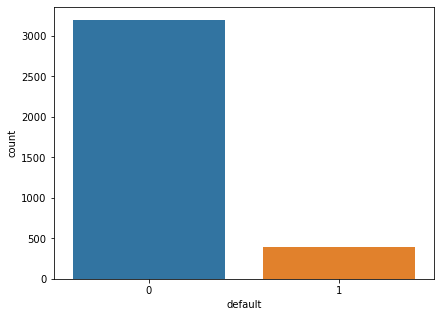

In [30]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(Company['default'])

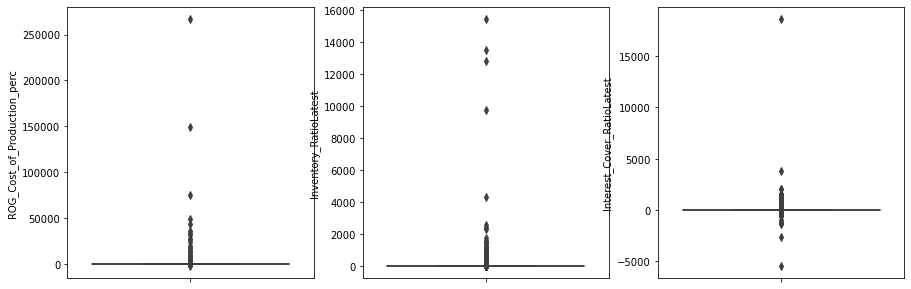

In [31]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = Company['ROG_Cost_of_Production_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.boxplot(y = Company['Inventory_RatioLatest'])
# plt.show()
plt.subplot(1,3,3)
sns.boxplot(y = Company['Interest_Cover_RatioLatest'])
plt.show()

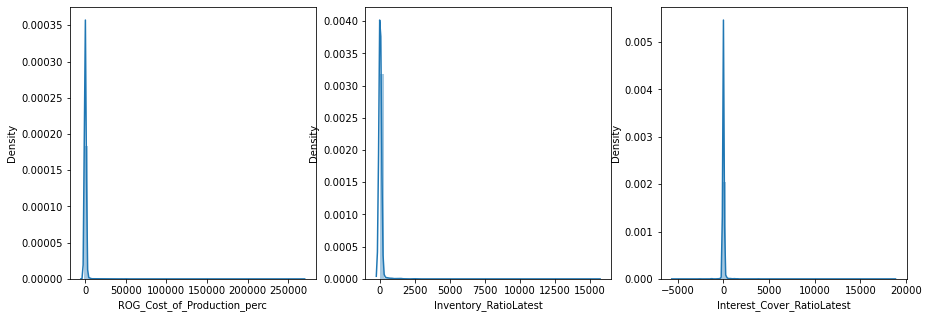

In [32]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(Company['ROG_Cost_of_Production_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.distplot(Company['Inventory_RatioLatest'])
# plt.show()
plt.subplot(1,3,3)
sns.distplot(Company['Interest_Cover_RatioLatest'])
plt.show()

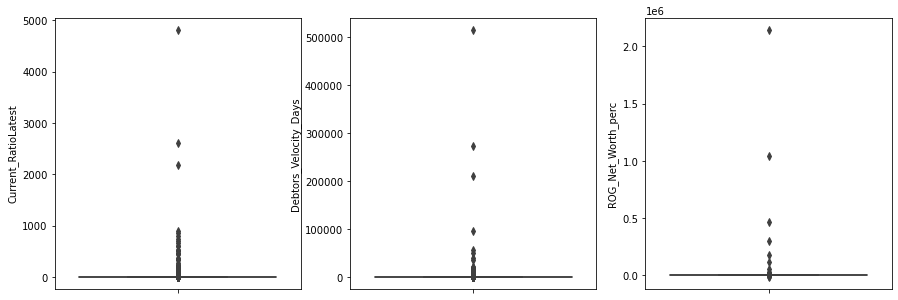

In [33]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = Company['Current_RatioLatest'])
plt.subplot(1,3,2)
sns.boxplot(y = Company['Debtors_Velocity_Days'])
plt.subplot(1,3,3)
sns.boxplot(y = Company['ROG_Net_Worth_perc'])
plt.show()


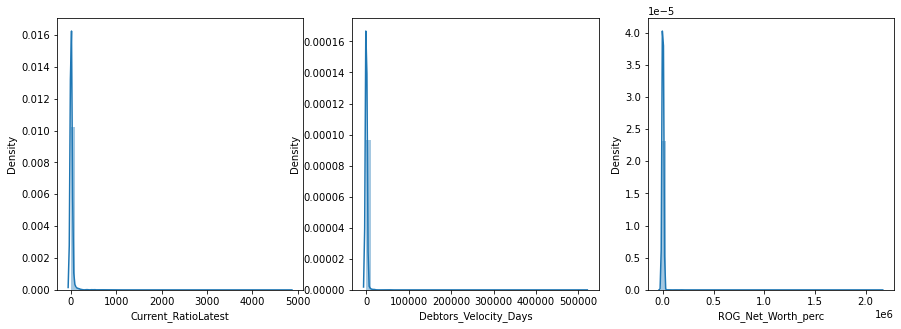

In [34]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(Company['Current_RatioLatest'])
plt.subplot(1,3,2)
sns.distplot(Company['Debtors_Velocity_Days'])
plt.subplot(1,3,3)
sns.distplot(Company['ROG_Net_Worth_perc'])
plt.show()


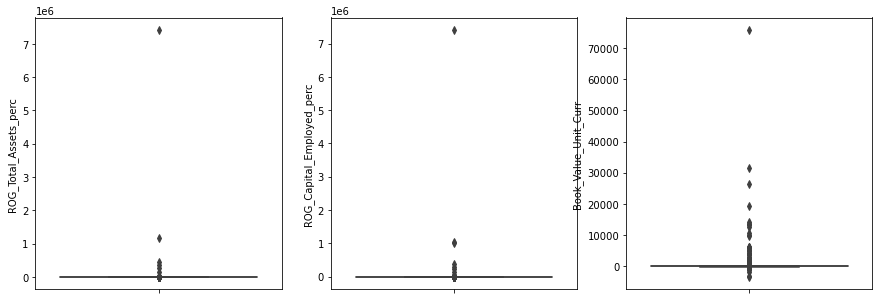

In [35]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = Company['ROG_Total_Assets_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.boxplot(y = Company['ROG_Capital_Employed_perc'])
# plt.show()
plt.subplot(1,3,3)
sns.boxplot(y = Company['Book_Value_Unit_Curr'])
plt.show()

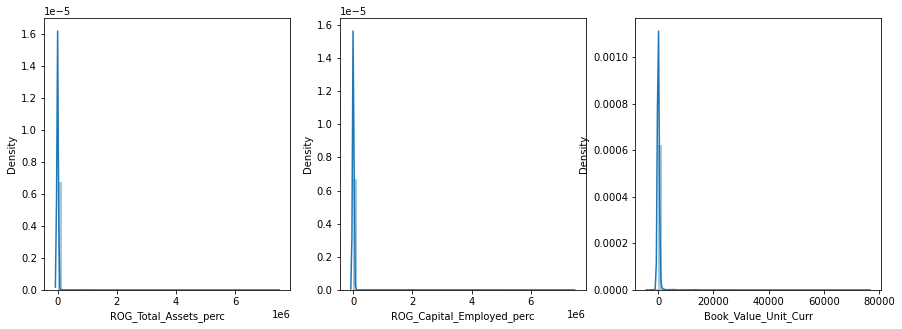

In [36]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(Company['ROG_Total_Assets_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.distplot(Company['ROG_Capital_Employed_perc'])
# plt.show()
plt.subplot(1,3,3)
sns.distplot(Company['Book_Value_Unit_Curr'])
plt.show()

In [37]:
num_df = Company2.select_dtypes(exclude=['object'])

for i in Company2.columns:
    print("Skewness for", i,"is: ",round(num_df[i].skew(),2))

Skewness for ROG_Cost_of_Production_perc is:  37.26
Skewness for Inventory_RatioLatest is:  27.0
Skewness for Current_RatioLatest is:  31.25
Skewness for Interest_Cover_RatioLatest is:  40.82
Skewness for Debtors_Velocity_Days is:  38.66
Skewness for ROG_Net_Worth_perc is:  44.83
Skewness for ROG_Total_Assets_perc is:  57.3
Skewness for ROG_Capital_Employed_perc is:  56.43
Skewness for Book_Value_Unit_Curr is:  32.98
Skewness for default is:  2.52


<AxesSubplot:xlabel='default', ylabel='Book_Value_Unit_Curr'>

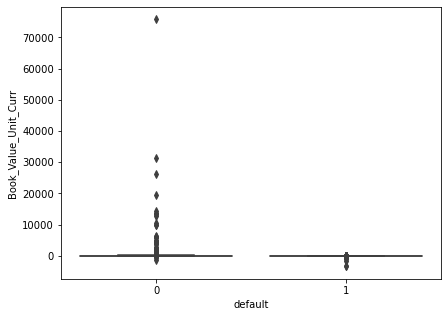

In [38]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Company['default'], Company['Book_Value_Unit_Curr'])

<AxesSubplot:xlabel='default', ylabel='Net_Sales'>

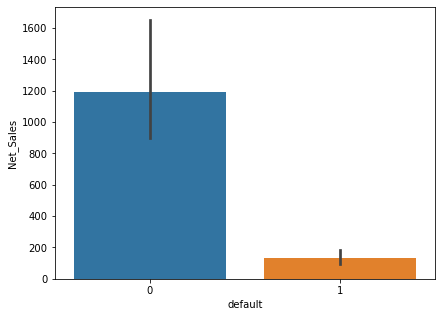

In [39]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(Company['default'], Company['Net_Sales'])

<AxesSubplot:xlabel='default', ylabel='Inventory_Velocity_Days'>

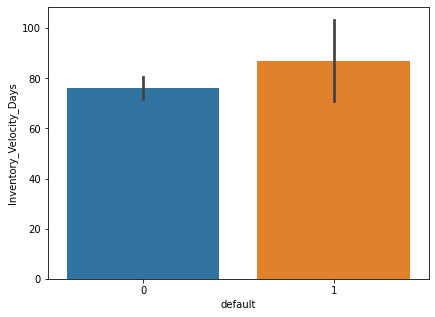

In [40]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(Company['default'], Company['Inventory_Velocity_Days'])

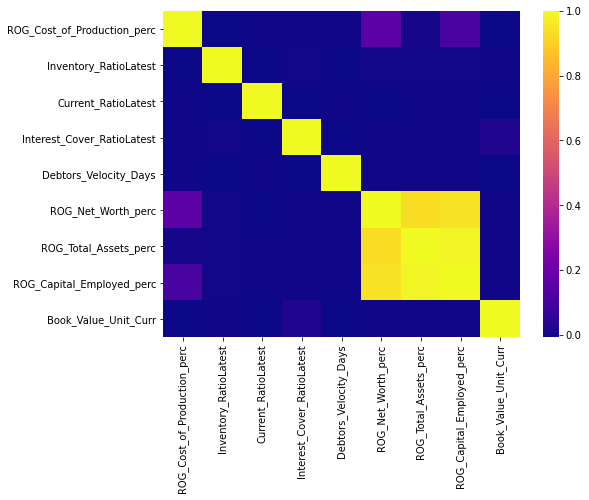

In [41]:
plt.subplots(figsize = (8,6))
sns.heatmap(Company[['ROG_Cost_of_Production_perc','Inventory_RatioLatest','Current_RatioLatest','Interest_Cover_RatioLatest','Debtors_Velocity_Days','ROG_Net_Worth_perc','ROG_Total_Assets_perc','ROG_Capital_Employed_perc','Book_Value_Unit_Curr']].corr(),cmap = 'plasma')
plt.show()

# Duplicates check

In [24]:
dups = Company.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Company[dups]

Number of duplicate rows = 0


,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_RatioLatest,Fixed_Assets_RatioLatest,Inventory_RatioLatest,Debtors_RatioLatest,Total_Asset_Turnover_RatioLatest,Interest_Cover_RatioLatest,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block


In [25]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [26]:
Company[['default','Networth_Next_Year']].tail(5)

,default,Networth_Next_Year
3581,0,72677.77
3582,0,79162.19
3583,0,88134.31
3584,0,91293.70
3585,0,111729.10


In [27]:
Company['default'].value_counts()

0    3197
1     388
Name: default, dtype: int64

In [28]:
# Checking proportion of default
Company['default'].value_counts(normalize=True)

0   0.89
1   0.11
Name: default, dtype: float64

Data seems highly imbalanced

In [42]:
Company1=Company[['Networth_Next_Year', 'Equity_Paid_Up','Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block','Net_Working_Capital', 'Current_Assets',\
       'Current_Liabilities_and_Provisions', 'Total_Assets_to_Liabilities',\
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',\
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',\
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',\
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',\
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',\
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',\
       'Cash_Flow_From_Operating_Activities',\
       'Cash_Flow_From_Investing_Activities',\
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',\
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',\
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',\
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',\
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',\
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_perc',\
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',\
       'Current_RatioLatest', 'Fixed_Assets_RatioLatest',\
       'Inventory_RatioLatest', 'Debtors_RatioLatest',\
       'Total_Asset_Turnover_RatioLatest', 'Interest_Cover_RatioLatest',\
       'PBIDTM_percLatest', 'PBITM_percLatest', 'PBDTM_percLatest',\
       'CPM_percLatest', 'APATM_percLatest', 'Debtors_Velocity_Days',\
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',\
       'Value_of_Output_to_Total_Assets', 'Value_of_Output_to_Gross_Block',\
       'default']]

In [43]:
Company1.size

236610

In [44]:
Q1 = Company1.quantile(0.25)
Q3 = Company1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [45]:
((Company1 > UL) | (Company1 < LL)).sum().sum()

42449

In [46]:
42449/236610*100

17.940492794049277

In [47]:
Q1 = 3.98
Q3 = 123.78
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print("UL",UL)
print("LL",LL)

UL 303.48
LL -175.72


In [48]:
# outlier_df = Company1[Company1['Networth_Next_Year'] < LL]
outlier_df=Company1[(Company1['Networth_Next_Year'] >303.48) | (Company1['Networth_Next_Year'] < -175.72)]

In [49]:
outlier_df['default'].value_counts()

0    603
1     73
Name: default, dtype: int64

In [50]:
73/388

0.18814432989690721

Remove unwanted columns

In [51]:
Company.drop(['Co_Code','Co_Name','Revenue_earnings_in_forex','Revenue_expenses_in_forex','Capital_expenses_in_forex','ROG_Revenue_earnings_in_forex_perc','ROG_Revenue_expenses_in_forex_perc','ROG_Market_Capitalisation_perc','Book_Value_Adj_Unit_Curr'],axis=1,inplace=True)

Data Entry issue

In [53]:
Company['Inventory_Velocity_Days']=Company['Inventory_Velocity_Days'].replace(-199,199)

Treat Outliers - Treatment 1

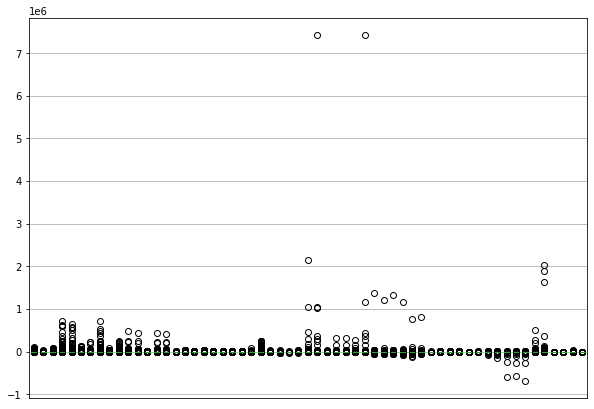

In [56]:
plt.figure(figsize=(10,7))
Company.boxplot()
plt.xticks([])
plt.show()

In [55]:
Company_num=Company[['Equity_Paid_Up','Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block','Net_Working_Capital', 'Current_Assets',\
       'Current_Liabilities_and_Provisions', 'Total_Assets_to_Liabilities',\
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',\
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',\
       'PAT', 'Adjusted_PAT', 'CP', 'Book_Value_Unit_Curr',\
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',\
       'Cash_Flow_From_Operating_Activities',\
       'Cash_Flow_From_Investing_Activities',\
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',\
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',\
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',\
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',\
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',\
       'ROG_PAT_perc', 'ROG_CP_perc','Current_RatioLatest', 'Fixed_Assets_RatioLatest',\
       'Inventory_RatioLatest', 'Debtors_RatioLatest',\
       'Total_Asset_Turnover_RatioLatest', 'Interest_Cover_RatioLatest',\
       'PBIDTM_percLatest', 'PBITM_percLatest', 'PBDTM_percLatest',\
       'CPM_percLatest', 'APATM_percLatest', 'Debtors_Velocity_Days',\
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',\
       'Value_of_Output_to_Total_Assets', 'Value_of_Output_to_Gross_Block',\
       ]]

In [57]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [58]:
for column in Company_num.columns: 
    lr,ur=remove_outlier(Company_num[column])
    Company_num[column]=np.where(Company_num[column]>ur,ur,Company_num[column])
    Company_num[column]=np.where(Company_num[column]<lr,lr,Company_num[column])

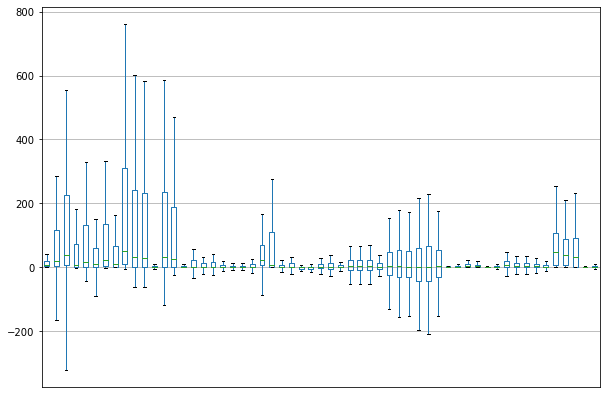

In [59]:
plt.figure(figsize=(10,7))
Company_num.boxplot()
plt.xticks([])
plt.show()

In [60]:
Q1 = Company1.quantile(0.25)
Q3 = Company1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [61]:
((Company_num > UL) | (Company_num < LL)).sum().sum()
# Below are the outlier datas

0

In [62]:
Company_X=Company_num.copy()
# Company_X = Company.drop(['default','Networth_Next_Year'], axis = 1)
Company_Y = Company['default']

In [63]:
Company_X.isnull().sum().sum()

0

In [64]:
import statsmodels.formula.api as SM

In [65]:
X_train, X_test, y_train, y_test = train_test_split(Company_X, Company_Y, 
                                                    test_size = 0.33, random_state = 42,stratify=Company['default'])

In [66]:
Company_train = pd.concat([X_train,y_train], axis=1)
Company_test = pd.concat([X_test,y_test], axis=1)

In [67]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [68]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
30,ROG_Gross_Block_perc,1.51
54,Inventory_Velocity_Days,1.90
33,ROG_Cost_of_Production_perc,2.03
53,Creditors_Velocity_Days,2.33
43,Inventory_RatioLatest,2.36
41,Current_RatioLatest,2.38
46,Interest_Cover_RatioLatest,2.45
26,Cash_Flow_From_Investing_Activities,2.46
52,Debtors_Velocity_Days,2.47
44,Debtors_RatioLatest,2.52


In [69]:
# f_1 = 'default ~ ROG_Gross_Block_perc+Inventory_Velocity_Days+ROG_Cost_of_Production_perc+Creditors_Velocity_Days+Inventory_RatioLatest+Current_RatioLatest+Interest_Cover_RatioLatest+Cash_Flow_From_Investing_Activities+Debtors_Velocity_Days+Debtors_RatioLatest+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Total_Assets_perc+Cash_Flow_From_Operating_Activities+ROG_Capital_Employed_perc+Market_Capitalisation+Selling_Cost+Equity_Paid_Up+Other_Income+Book_Value_Unit_Curr'
f_1 = 'default ~ ROG_Cost_of_Production_perc+Inventory_RatioLatest+Current_RatioLatest+Interest_Cover_RatioLatest+Debtors_Velocity_Days+ROG_Net_Worth_perc+ROG_Total_Assets_perc+ROG_Capital_Employed_perc+Book_Value_Unit_Curr'

In [70]:
model_1 = SM.logit(formula = f_1, data=Company_train).fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.126047
         Iterations: 32
         Function evaluations: 37
         Gradient evaluations: 37


In [71]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 May 2022   Pseudo R-squ.:                  0.6324
Time:                        18:11:38   Log-Likelihood:                -302.64
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                2.003e-218
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0990      0.185     -0.536      0.592      -0.461       0.263
ROG_Cost_of_Production_perc    -0.0085      0.003     -2.752      0.006      -0.015      -0.002
Inventory_RatioLatest          -0.0393      0.017     -2.272      0.023      -0.073      -0.005
Current_RatioLatest            -0.6238      0.090     -6.945      0.000      -0.800      -0.448
Interest_Cover_RatioLatest     -0.1147      0.040     -2.863      0.004      -0.193      -0.036
Debtors_Velocity_Days          -0.0026      0.001     -2.177      0.029      -0.005      -0.000
ROG_Net_Worth_perc             -0.0384      0.009     -4.150      0.000      -0.056      -0.020
ROG_Total_Assets_perc          -0.0224      0.009     -2.434      0.015      -0.040      -0.004
ROG_Capital_Employed_perc       0.0202      0.009      2.245      0.025       0.003       0.038
Book_Value_Unit_Curr           -0.1108      0.010    -11.654      0.000      -0.129      -0.092
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [72]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.6215007428849103


In [73]:
calc_vif(X_train[['ROG_Cost_of_Production_perc','Inventory_RatioLatest','Current_RatioLatest','Interest_Cover_RatioLatest','Debtors_Velocity_Days','ROG_Net_Worth_perc','ROG_Total_Assets_perc','ROG_Capital_Employed_perc','Book_Value_Unit_Curr']]).sort_values(by='VIF', ascending = True)

,variables,VIF
0,ROG_Cost_of_Production_perc,1.19
4,Debtors_Velocity_Days,1.52
1,Inventory_RatioLatest,1.58
3,Interest_Cover_RatioLatest,1.61
2,Current_RatioLatest,1.62
8,Book_Value_Unit_Curr,1.67
5,ROG_Net_Worth_perc,2.05
6,ROG_Total_Assets_perc,2.96
7,ROG_Capital_Employed_perc,3.23


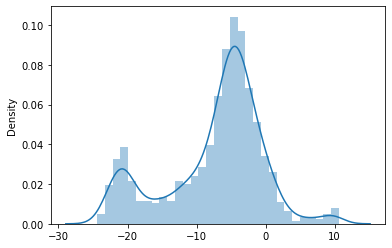

In [74]:
sns.distplot(model_1.fittedvalues);

In [75]:
y_predict_train = model_1.predict(X_train)
# y_predict_train

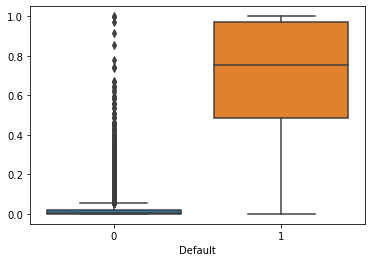

In [76]:
sns.boxplot(x=Company['default'],y=y_predict_train)
plt.xlabel('Default');

In [77]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

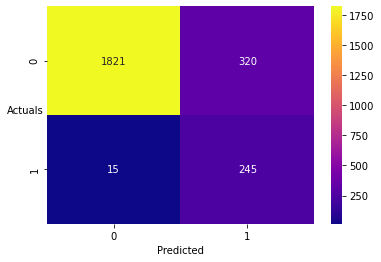

In [78]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [79]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1821 
False Positives: 320 
False Negatives: 15 
True Positives: 245


In [80]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.992     0.851     0.916      2141
           1      0.434     0.942     0.594       260

    accuracy                          0.860      2401
   macro avg      0.713     0.896     0.755      2401
weighted avg      0.931     0.860     0.881      2401



In [81]:
y_predict_test = model_1.predict(X_test)
# y_predict_test

In [82]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

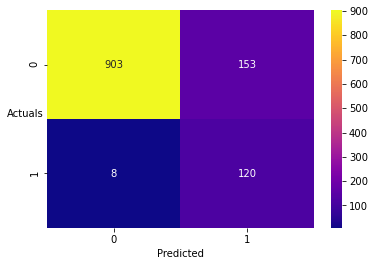

In [83]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [84]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 903 
False Positives: 153 
False Negatives: 8 
True Positives: 120


In [85]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.855     0.918      1056
           1      0.440     0.938     0.599       128

    accuracy                          0.864      1184
   macro avg      0.715     0.896     0.758      1184
weighted avg      0.932     0.864     0.884      1184



In [86]:
y_class_pred_train=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

In [87]:
print(metrics.classification_report(y_train,y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.864     0.923      2141
           1      0.455     0.938     0.613       260

    accuracy                          0.872      2401
   macro avg      0.723     0.901     0.768      2401
weighted avg      0.933     0.872     0.890      2401



In [88]:
y_class_pred_test=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

In [90]:
print(metrics.classification_report(y_test,y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.868     0.926      1056
           1      0.463     0.938     0.620       128

    accuracy                          0.876      1184
   macro avg      0.727     0.903     0.773      1184
weighted avg      0.934     0.876     0.893      1184



AUC: 0.901


Text(0.5, 1.0, 'Traning Record for 0.07 cut-off')

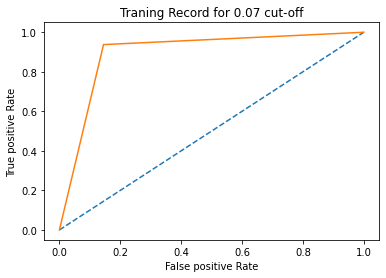

In [91]:
train_auc = roc_auc_score(y_train, y_class_pred_train)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Traning Record for 0.07 cut-off')

AUC: 0.903


Text(0.5, 1.0, 'Testing Record for 0.07 cut-off')

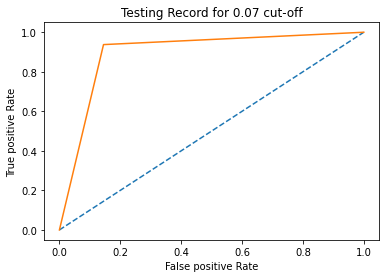

In [92]:
test_auc = roc_auc_score(y_test, y_class_pred_test)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Testing Record for 0.07 cut-off')